In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/meet7834/tomatoprice/README.md
/kaggle/input/d/meet7834/tomatoprice/noTomatoDataset.csv
/kaggle/input/d/meet7834/tomatoprice/ModifiedDatasetTomato.csv
/kaggle/input/tomatodataset/README.md
/kaggle/input/tomatodataset/noTomatoDataset.csv
/kaggle/input/tomatodataset/ModifiedDatasetTomato.csv


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn. linear_model import Lasso

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
data=pd.read_csv('../input/tomatodataset/ModifiedDatasetTomato.csv')
data

,prod_id,avg price,prod_name,order date,pack sold,order,Season,Month
0,996,4.645859,Tomato Desi 500 Gm,1,7687,6472,winter,march
1,996,10.222268,Tomato Desi 500 Gm,2,2974,2434,winter,march
2,996,16.719044,Tomato Desi 500 Gm,3,1568,1171,winter,march
3,996,16.853556,Tomato Desi 500 Gm,4,1700,1195,winter,march
4,996,16.427644,Tomato Desi 500 Gm,5,1549,1078,winter,march
...,...,...,...,...,...,...,...,...
154,996,8.286688,Tomato (Desi),18,7672,6863,monsoon,august
155,996,8.215190,Tomato (Desi),19,7054,6306,monsoon,august
156,996,10.790909,Tomato (Desi),20,1163,962,monsoon,august
157,996,11.784903,Tomato (Desi),21,1837,1464,monsoon,august


In [4]:
#encoding season column
data.replace({'Season':{'winter':1,'summer':2,'monsoon':3}},inplace=True)
data.replace({'Month':{ 
        'march': 3,
        'april': 4,
        'may': 5,
        'june': 6,
        'july': 7,
        'august': 8}},inplace=True)
              
data

,prod_id,avg price,prod_name,order date,pack sold,order,Season,Month
0,996,4.645859,Tomato Desi 500 Gm,1,7687,6472,1,3
1,996,10.222268,Tomato Desi 500 Gm,2,2974,2434,1,3
2,996,16.719044,Tomato Desi 500 Gm,3,1568,1171,1,3
3,996,16.853556,Tomato Desi 500 Gm,4,1700,1195,1,3
4,996,16.427644,Tomato Desi 500 Gm,5,1549,1078,1,3
...,...,...,...,...,...,...,...,...
154,996,8.286688,Tomato (Desi),18,7672,6863,3,8
155,996,8.215190,Tomato (Desi),19,7054,6306,3,8
156,996,10.790909,Tomato (Desi),20,1163,962,3,8
157,996,11.784903,Tomato (Desi),21,1837,1464,3,8


In [5]:
#splitting dataset into X and y
y = data['avg price']
X = data.drop(['avg price','prod_name', 'order', 'prod_id', 'pack sold'], axis=1)
#for demand
z = data['order']
w = data.drop(['order', 'pack sold' , 'prod_id', 'prod_name'], axis =1)
w

,avg price,order date,Season,Month
0,4.645859,1,1,3
1,10.222268,2,1,3
2,16.719044,3,1,3
3,16.853556,4,1,3
4,16.427644,5,1,3
...,...,...,...,...
154,8.286688,18,3,8
155,8.215190,19,3,8
156,10.790909,20,3,8
157,11.784903,21,3,8


In [6]:
#splitting into testing and trainning
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=False,random_state=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=False,random_state=1)
w_train,w_test,z_train,z_test=train_test_split(w,z,train_size=0.7,shuffle=False,random_state=1)
w_train,w_test,z_train,z_test=train_test_split(w,z,train_size=0.7,shuffle=False,random_state=1)

In [7]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
    "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_train, y_train)))

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.
                     Linear Regression R^2 Score: 0.52306
 Linear Regression (L2 Regularization) R^2 Score: 0.52203
 Linear Regression (L1 Regularization) R^2 Score: 0.41565
                   K-Nearest Neighbors R^2 Score: 0.67747
                        Neural Network R^2 Score: 0.24228
Support Vector Machine (Linear Kernel) R^2 Score: 0.35873
   Support Vector Machine (R

In [8]:
#model selection linear regression
price_reg_model= CatBoostRegressor(verbose=0)
price_reg_model.fit(X_train,y_train)

order_reg_model = CatBoostRegressor(verbose=0)
order_reg_model.fit(w_train,z_train)

In [9]:
#Training data prediction
price_data_pred= price_reg_model.predict(X_train)
price_data_pred

array([ 5.2827244 , 10.38809665, 16.35316761, 16.53745688, 16.19649858,
       17.20610628, 17.09970067, 16.29398699, 13.74480143, 14.69645666,
       14.82214941, 14.94579349, 14.86537159, 14.89410505, 14.90590154,
       14.90262189, 15.24739575, 15.22240978, 15.04050473, 14.99201225,
       14.68454548, 14.43341073, 14.54005892, 15.72047839, 16.72376961,
       16.33229079,  8.01268679, 16.86904138, 17.57234553, 17.58841276,
       16.73754742, 16.88555533, 17.39901195, 17.09918419, 17.72483656,
       19.91970258, 20.15676946, 20.70207491, 20.76628703, 20.15271823,
       19.7355604 , 19.28241665, 19.11181987, 19.22638559, 19.23744187,
       18.85593668, 18.94120152, 19.39837167, 19.431298  , 19.28257786,
       19.15442801, 16.30518558, 17.08344706, 16.07087247, 17.96790671,
       17.90282593, 17.89746978, 19.01397118, 18.52793412, 17.71790099,
       17.12877755, 17.38985318, 18.76936207, 18.73298237, 18.75113107,
       12.65196839, 11.51347377, 11.92765888, 13.65230724, 17.61

In [10]:
order_data_pred= order_reg_model.predict(w_train)
order_data_pred

array([6434.60899392, 2479.13484514, 1119.54425567, 1103.58816644,
       1100.59338794,  940.68178782,  945.57293905, 1002.46349239,
       1138.35277574,  947.04569569, 1011.54798506,  995.89020229,
        822.37159097,  799.93130265,  789.27939508,  792.95528213,
        800.22002168,  732.17572155,  769.85161488,  961.04435875,
        951.65033809, 1075.78054764, 1142.98823168,  736.27051654,
        574.7156888 ,  480.46265714, 3779.10274952, 1008.60472153,
        885.26760377,  778.13509016,  771.18519444,  662.84256019,
        747.15911096,  759.44827174,  775.5837113 ,  742.90161566,
        778.75091018,  800.11345443,  727.46492704,  762.98656629,
        761.84918344,  778.3286502 ,  795.64924897,  782.51877697,
        775.38428792,  777.92946753,  775.42432359,  818.04731372,
        882.96254083,  860.50400215,  914.08659374,  463.19046675,
        467.55900167,  371.09593145,  442.03198213,  524.72160189,
        931.85107076,  346.68113316, 1075.05694174, 1352.95936

In [11]:
from sklearn import metrics
error_score_price = metrics.r2_score(y_train,price_data_pred )
print (error_score_price)

0.9950516594634825


In [12]:
error_score_order = metrics.r2_score(z_train,order_data_pred )
print (error_score_order)

0.9961666393126019


In [13]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, price_data_pred))
print(mean_squared_error(z_train, order_data_pred))

0.2513644936961082
4736.253071867812


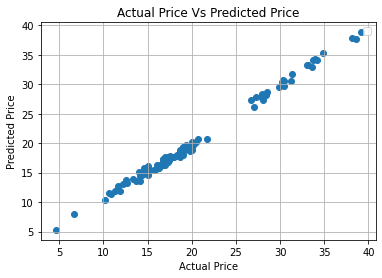

In [14]:

#visualize the actual prices and Predicted prices
from matplotlib import pyplot as plt
#plt.scatter(X_train,y_train, color = 'blue', label = 'Actual')
plt.scatter(y_train,price_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

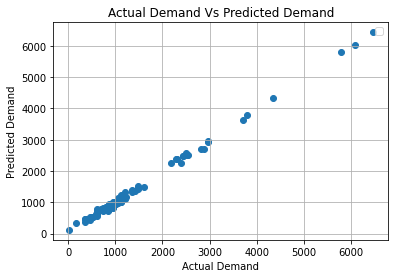

In [15]:
plt.scatter(z_train,order_data_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual Demand Vs Predicted Demand")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Training data prediction
price_testing_data_pred= price_reg_model.predict(X_test)
price_testing_data_pred

array([12.18954385, 12.40912496, 12.8310373 , 13.36026027, 12.22303886,
       12.44318804, 13.16053876, 15.69902557, 16.34522789, 16.48746652,
       12.71662026, 12.91800595, 14.93103296, 15.11533495, 15.17359437,
       15.09861498, 17.78311046, 17.94581276, 15.79411162, 17.08928508,
       17.46433577, 17.54805091, 18.25161576, 19.28305713, 21.31092518,
       21.32210476, 19.47629059, 17.79954487, 11.87028118, 13.55658645,
       11.32228846, 12.18954385, 12.40912496, 12.8310373 , 13.36026027,
       12.22303886, 12.44318804, 13.16053876, 15.69902557, 16.34522789,
       16.48746652, 12.71662026, 12.91800595, 14.93103296, 15.11533495,
       15.17359437, 15.09861498, 17.78311046])

In [17]:
order_testing_data_pred= order_reg_model.predict(w_test)
order_testing_data_pred

array([3265.91252248, 3213.43963035, 4891.19917758, 3871.54733394,
       4675.93755393, 4569.03735709, 4385.81055145, 4291.42702713,
       3526.51409096, 4154.04243251, 4152.90200162, 4140.06048891,
       4273.29632722, 3400.89320951, 4129.89694644, 4076.5053405 ,
       3383.08183832, 3458.1206795 , 3039.46299928, 3337.20376923,
       3271.37213144, 3219.84808732, 3209.4344162 , 3163.06008581,
       2837.10607325, 2957.38562363, 3788.65514675, 4556.84640378,
       4658.26146051, 4684.71293566, 4686.95601892, 4485.50814358,
       4203.1948636 , 4027.43866919, 3871.54733394, 3873.78981085,
       3784.99181597, 4385.81055145, 3797.31356889, 3526.51409096,
       4186.11918619, 3824.88180237, 4451.0013752 , 3437.50111174,
       3400.89320951, 4440.83783274, 3967.3421866 , 4028.37911614])

In [18]:
from sklearn import metrics
error_score_price_test = metrics.r2_score(y_test,price_testing_data_pred )
print (error_score_price_test)
error_score_order_test = metrics.r2_score(z_test,order_testing_data_pred )
print (error_score_order_test)

-8.872254729260916
-1.9711395071135271


In [19]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, price_testing_data_pred))
print(mean_squared_error(z_test, order_testing_data_pred))

60.506939831085084
9080250.723051326


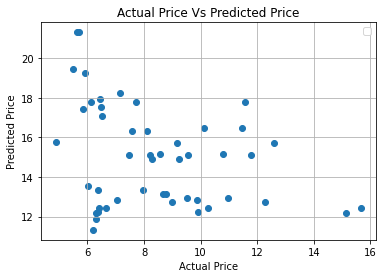

In [20]:
#visualize the actual prices and Predicted prices
from matplotlib import pyplot as plt
#plt.scatter(X_train,y_train, color = 'blue', label = 'Actual')
plt.scatter(y_test,price_testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

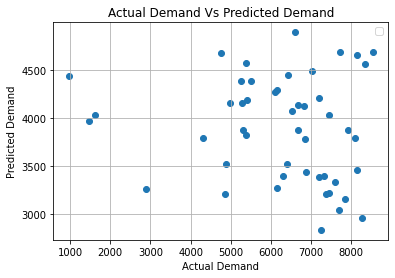

In [21]:
plt.scatter(z_test,order_testing_data_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual Demand Vs Predicted Demand")
plt.legend()
plt.grid(True)
plt.show()